## Explainability Global Metrics for Binary Classification and Regression

#### Imports

In [1]:
import sys
sys.path.append("../../")

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler

from holisticai.datasets import load_adult

# data and simple preprocessing
dataset = load_adult()['frame']
dataset = dataset.iloc[0:1000,]
X = pd.get_dummies(dataset.drop(columns=['class', 'fnlwgt']), drop_first=True)
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
X_standard = pd.DataFrame(X_standard, columns=X.columns)

y_clf = pd.DataFrame(dataset['class'].apply(lambda x: 1 if x == '>50K' else 0))
y_reg = pd.DataFrame(dataset['fnlwgt'])
y_reg = scaler.fit_transform(y_reg)

# regression
reg = LinearRegression()
reg.fit(X_standard, y_reg)

# classification
clf = LogisticRegression(random_state=42, max_iter=100)
clf.fit(X_standard, y_clf)

# import Explainer
from holisticai.explainability import Explainer

### Global Metrics

In [2]:
# instantiate explainer permutation
explainer = Explainer(based_on='feature_importance', 
                      strategy_type='permutation', 
                      model_type='binary_classification', 
                      model=clf, 
                      x=X_standard,
                      y=y_clf)

In [3]:
explainer.metrics()

,Value,Reference
Fourth Fifths,0.229167,0
Importance Spread Divergence,1.113834,-
Importance Spread Ratio,0.755971,0
Global Overlap Score [label=0],2.593750,1
Global Overlap Score [label=1],0.197917,1
Global Range Overlap Score [label=0],0.741399,1
Global Range Overlap Score [label=1],0.728108,1
Global Explainability Score,1.000000,1


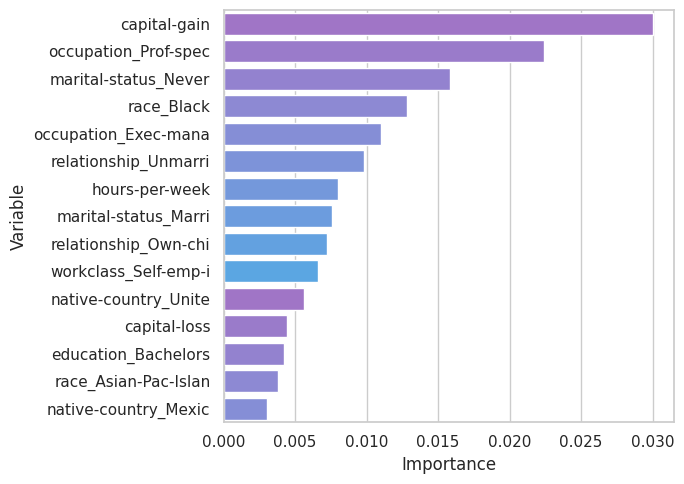

In [4]:
explainer.bar_plot(max_display=15)

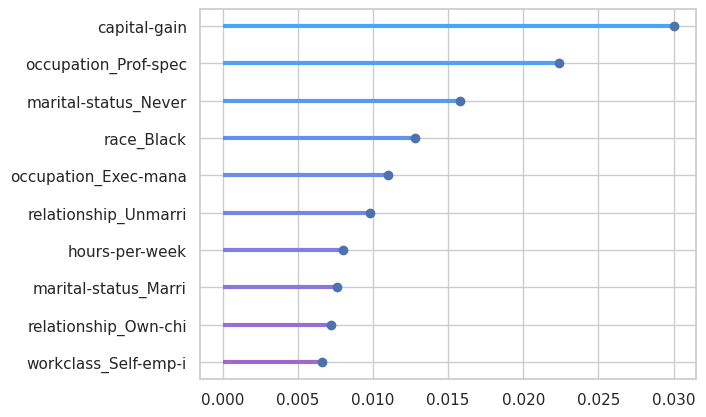

In [3]:
explainer.lolipop_plot(max_display=10)

In [4]:
# instantiate explainer permutation
explainer = Explainer(based_on='feature_importance', 
                      strategy_type='permutation', 
                      model_type='regression', 
                      model=reg, 
                      x=X_standard, 
                      y=y_reg)

In [5]:
explainer.metrics()

,Value,Reference
Fourth Fifths,0.041667,0
Importance Spread Divergence,2.579524,-
Importance Spread Ratio,0.434854,0
Global Overlap Score [Q0-Q1],10.989583,1
Global Overlap Score [Q1-Q2],10.968750,1
Global Overlap Score [Q2-Q3],8.708333,1
Global Overlap Score [Q3-Q4],6.968750,1
Global Range Overlap Score [Q0-Q1],0.893428,1
Global Range Overlap Score [Q1-Q2],0.899990,1
Global Range Overlap Score [Q2-Q3],0.867979,1


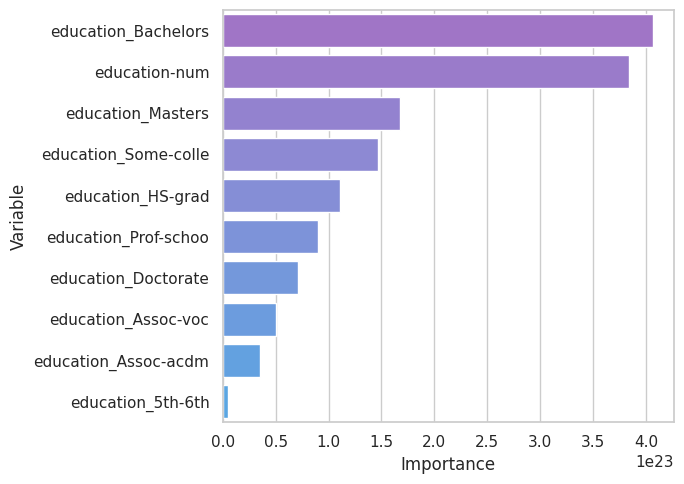

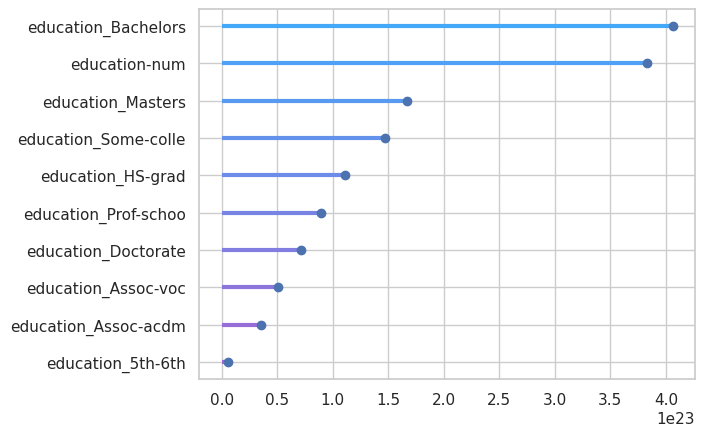

In [7]:
explainer.bar_plot(max_display=10)
explainer.lolipop_plot(max_display=10)

In [8]:
# instantiate explainer surrogate classification
explainer = Explainer(based_on='feature_importance', 
                      strategy_type='surrogate', 
                      model_type='binary_classification',
                      model=clf, 
                      x=X_standard, 
                      y=y_clf)

In [9]:
explainer.metrics()

,Value,Reference
Fourth Fifths,0.020833,0
Importance Spread Divergence,3.318287,-
Importance Spread Ratio,0.272999,0
Global Explainability Score,1.000000,1
Surrogate Efficacy Classification,0.822000,1


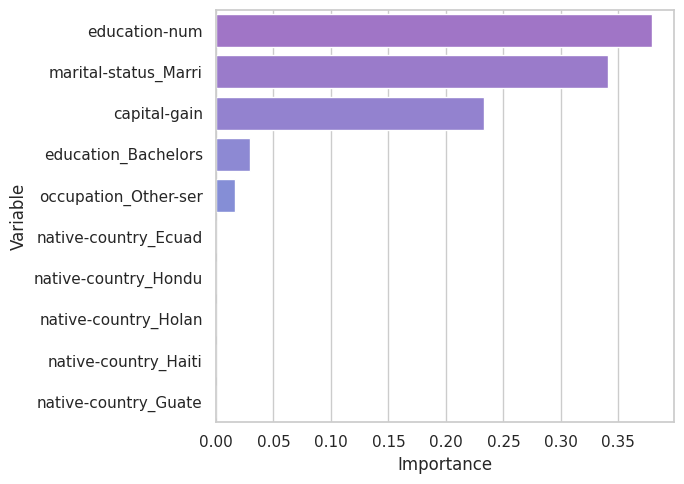

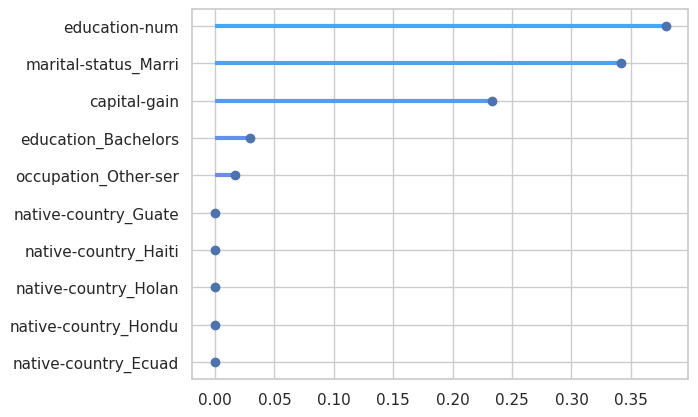

In [10]:
explainer.bar_plot(max_display=10)
explainer.lolipop_plot(max_display=10)

In [11]:
# instantiate explainer surrogate regression
explainer = Explainer(based_on='feature_importance', 
                      strategy_type='surrogate', 
                      model_type='regression', 
                      model=reg, 
                      x=X_standard, 
                      y=y_reg)

In [12]:
explainer.metrics()

,Value,Reference
Fourth Fifths,0.020833,0
Importance Spread Divergence,3.207798,-
Importance Spread Ratio,0.297206,0
Global Explainability Score,1.000000,1
Surrogate Efficacy Regression,0.977609,0


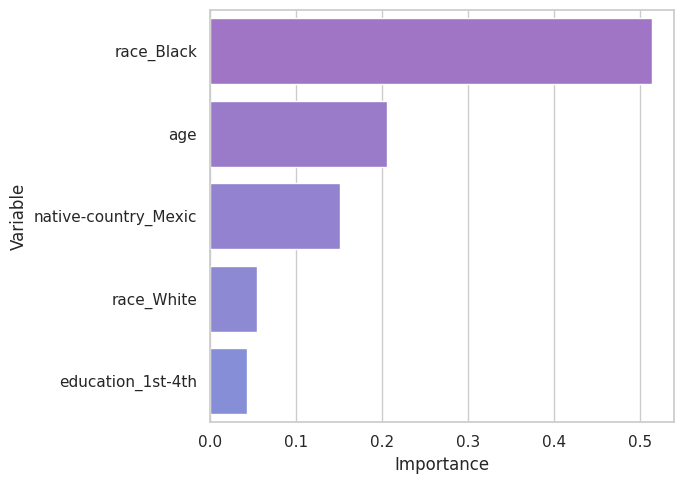

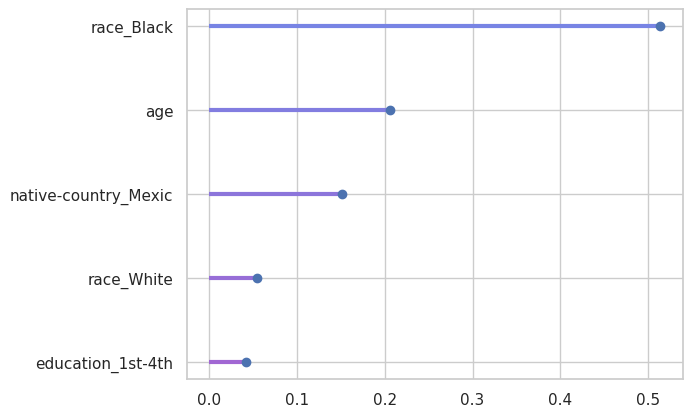

In [14]:
explainer.bar_plot(max_display=5)
explainer.lolipop_plot(max_display=5)